In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# we can iterate through the data and check what look like it
# for img,label in train_data:
#   print(label.numpy())
#   plt.imshow(img.numpy(),cmap='Greys_r')
#   plt.show()
#   input()

In [4]:
train_images = (train_images.astype(np.float32) / 255.)
test_images = (test_images.astype(np.float32) / 255.)

In [5]:
train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

In [6]:
train_data = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_data = tf.data.Dataset.from_tensor_slices((test_images,test_labels))

# just print the shapes to get an idea of what we have here

# for img_batch,label_batch in train_data:
  # print(img_batch.shape, label_batch.shape)

In [7]:
batch_size = 64
shuffle_size = 100

train_data = train_data.shuffle(shuffle_size).batch(batch_size)
test_data = test_data.batch(batch_size)

In [8]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(32,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(10),
    ]
)

In [9]:
checkpoint_path = 'train/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                              save_weights_only=True,
                                              verbose=1)

In [10]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=3e-4),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [11]:
model.fit(train_data,batch_size=64,verbose=2,epochs=10,callbacks=[cp_callback])

Epoch 1/10

Epoch 1: saving model to train/cp.ckpt
938/938 - 13s - loss: 0.5039 - accuracy: 0.8498 - 13s/epoch - 14ms/step
Epoch 2/10

Epoch 2: saving model to train/cp.ckpt
938/938 - 3s - loss: 0.2194 - accuracy: 0.9347 - 3s/epoch - 3ms/step
Epoch 3/10

Epoch 3: saving model to train/cp.ckpt
938/938 - 5s - loss: 0.1705 - accuracy: 0.9496 - 5s/epoch - 5ms/step
Epoch 4/10

Epoch 4: saving model to train/cp.ckpt
938/938 - 5s - loss: 0.1434 - accuracy: 0.9578 - 5s/epoch - 5ms/step
Epoch 5/10

Epoch 5: saving model to train/cp.ckpt
938/938 - 3s - loss: 0.1243 - accuracy: 0.9633 - 3s/epoch - 3ms/step
Epoch 6/10

Epoch 6: saving model to train/cp.ckpt
938/938 - 3s - loss: 0.1103 - accuracy: 0.9670 - 3s/epoch - 3ms/step
Epoch 7/10

Epoch 7: saving model to train/cp.ckpt
938/938 - 3s - loss: 0.0985 - accuracy: 0.9701 - 3s/epoch - 4ms/step
Epoch 8/10

Epoch 8: saving model to train/cp.ckpt
938/938 - 3s - loss: 0.0880 - accuracy: 0.9737 - 3s/epoch - 3ms/step
Epoch 9/10

Epoch 9: saving model to 

In [12]:
model.evaluate(test_data)

157/157 [==============================] - 1s 2ms/step - loss: 0.1362 - accuracy: 0.9581


[0.13615132868289948, 0.9581000208854675]

# Now visualize weights with matplotlib

In [13]:
os.listdir(checkpoint_dir)

['cp.ckpt.data-00000-of-00001', 'checkpoint', 'cp.ckpt.index']

In [15]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
load_model = keras.models.load_model('my_model.h5')

weights = load_model.get_weights()

In [18]:
layer_weight = weights[0]

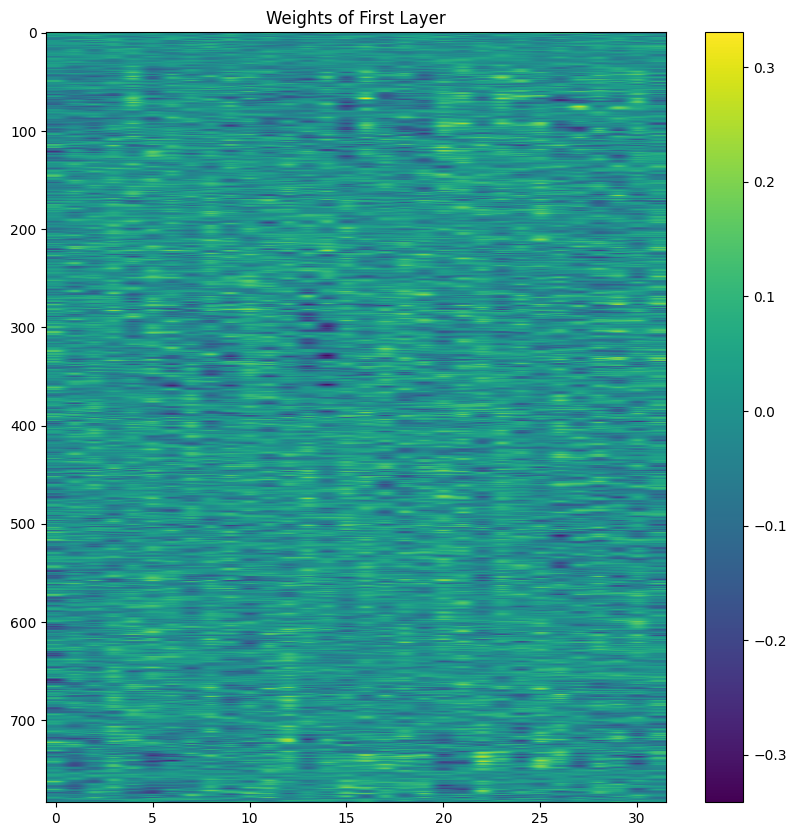

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(layer_weight,cmap='viridis',aspect='auto')
plt.colorbar()
plt.title('Weights of First Layer')
plt.show()